In [22]:
beginF = "Data/Sequencing Data/Raw Sequencing Data/" # where sequencing data files are located

f = open(beginF + "F3_sequences.fasta")


raw_sequences = []
for line in f:
    if not line[0] == '>':
        raw_sequences.append(line[0:-1])
        
        
beginPrimersF = "Data/Sequencing Data/primers.fasta"

f2 = open(beginPrimersF)
forward_primers = []
reverse_primers = []

for line in f2:
    if not line[0] == '>':
        if len(forward_primers) < 9:
            forward_primers.append(line[0:-1])
        else:
            reverse_primers.append(line[0:-1])

In [23]:
print(raw_sequences[0:5])

print(forward_primers)
print(reverse_primers)

['ACAGGAGCAGAATTGAGTCGACAAAACACAGTAACCCAGGCTTATCTTCGTGCTGCCAGACCCTAACGATCCAACGCACCCAACAGATCGGAAGAGCACACGTTGAACTCCAGTCACCGCTCATTATCTCGTATGCCGTCTTCTGCTTGAAAAAAGGGGGGGGGGGGGGGGGGGGGG', 'ACAGGAGCAGAATTGAGTCGTCCCCCCCGCCAGCCCACACCTTATCTTCGTGCTGCCAGAGCAATAATTTTGTGTAATAGTTGGG', 'ACAGGAGCAGAATTGAGTCGGGTTAACCAGGCCACATAACCTTATCTTCGTGCTGCCAGAATTGACCAATAGAATCCAAAAGGGG', 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACCGCTCATTATCTCGTATGCCGTCTTCTGCTTGAAAAAAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG', 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACCGCTCATTATCTCGTATGCCGTCTTCTGCTTGAAAAAAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG']
['CTATCTGGCCTCAAAGCACT', 'TCTGGCAGCACGAAGATAAG', 'AGGAGACAAGTAACGTGTGC', 'TAAGAAAGGCATCGTCACCG', 'GTCACGTCACCAGGTAACAA', 'TTTCCGATAGTTGAGGCAGG', 'TGGTGAAACTACCGACTTCC', 'AGTTGGTGACTATCCGTCCT', 'CACATAGGCAAAGCGGAGTA']
['TTGACTCCTCCTCTTGCCTA', 'CGACTCAATTCTGCTCCTGT', 'GTCGAGCACTG

In [47]:
actual_payloads = []
pairs_indexes = []
for i in range(0, len(raw_sequences)):
    sequence = raw_sequences[i]
    
    fp_index = -100
    rp_index = -100
    for fp in forward_primers:
        if fp in sequence:
            fp_index = sequence.find(fp)
    for rp in reverse_primers:       
        if rp in sequence:
            rp_index = sequence.find(rp)
            break
    
    if rp_index == fp_index + 40:
        payload = sequence[fp_index + 20: rp_index]
        actual_payloads.append(payload)

In [51]:
position_A = []
position_C = []
position_G = []
position_T = []

for i in range(0, 20):
    countA = 0.0
    countC = 0.0
    countG = 0.0
    countT = 0.0
    
    for seq in actual_payloads:
        if seq[i] == 'A':
            countA = countA + 1
        elif seq[i] == 'C':
            countC = countC + 1
        elif seq[i] == 'G':
            countG = countG + 1
        elif seq[i] == 'T':
            countT = countT + 1
            
    position_A.append((countA / len(actual_payloads)) * 100)
    position_C.append((countC / len(actual_payloads))* 100)
    position_G.append((countG / len(actual_payloads))* 100)
    position_T.append((countT / len(actual_payloads))* 100)

(0.0, 100.0)

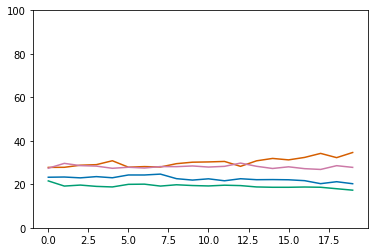

In [52]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-colorblind')
plt.plot(position_A)
plt.plot(position_C)
plt.plot(position_G)
plt.plot(position_T)
plt.ylim((0, 100))

Text(0.5, 1.0, "Expected Distribution of Nucleotides in Sequence of N's")

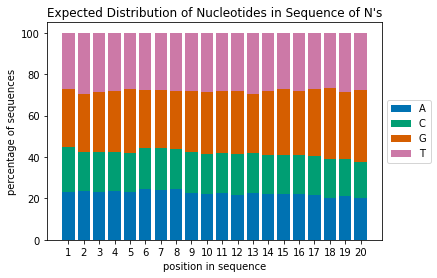

In [53]:
import numpy as np

fig, ax = plt.subplots()
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

ax.bar(labels, position_A, label='A')
ax.bar(labels, position_C, bottom=np.array(position_A), label='C')
ax.bar(labels, position_G,  bottom=np.array(position_A) + np.array(position_C), label='G')
ax.bar(labels, position_T, bottom=np.array(position_A) + np.array(position_C) + np.array(position_G),
       label='T')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('percentage of sequences')
ax.set_xlabel('position in sequence')
ax.set_title("Distribution of Nucleotides in Sequence of N's")